In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!unzip /content/data541.zip


Archive:  /content/data541.zip
  inflating: NY-House-Dataset.csv    


In [ ]:

df = pd.read_csv('/content/NY-House-Dataset.csv')


In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

##Removing unnecessary/ignorable data

In [ ]:
strings_to_remove = ['Pending', 'Contingent', 'Land for sale', 'For sale', 'Foreclosure', 'Condop for sale', 'Coming Soon', 'Mobile house for sale']

df = df[~df['TYPE'].isin(strings_to_remove)]

print(df)


In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


##Removing duplicates

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

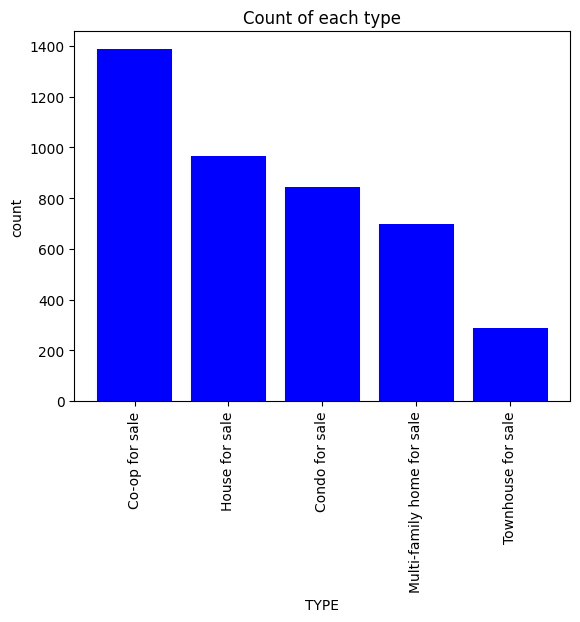

In [ ]:
counts = df['TYPE'].value_counts()
plt.bar(counts.index, counts, color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('TYPE')
plt.ylabel('count')
plt.title('Count of each type')

plt.show()

##Mapping the bins of each latitude and longitude combination

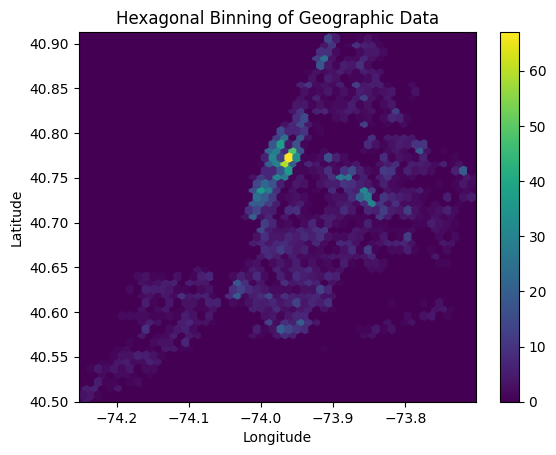

                                         BROKERTITLE  TYPE      PRICE  BEDS  \
0        Brokered by Douglas Elliman  -111 Fifth Ave     1     315000     2   
1                                Brokered by Serhant     1  195000000     7   
2                             Brokered by Sowae Corp     2     260000     4   
3                                Brokered by COMPASS     1      69000     3   
4  Brokered by Sotheby's International Realty - E...     4   55000000     7   

        BATH  PROPERTYSQFT                                            ADDRESS  \
0   2.000000        1400.0                               2 E 55th St Unit 803   
1  10.000000       17545.0  Central Park Tower Penthouse-217 W 57th New Yo...   
2   2.000000        2015.0                                   620 Sinclair Ave   
3   1.000000         445.0                            2 E 55th St Unit 908W33   
4   2.373861       14175.0                                        5 E 64th St   

                     STATE            

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.spatial import cKDTree


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TYPE'] = le.fit_transform(df['TYPE'])
type_mapping = dict(zip(le.classes_, le.transform(le.classes_)))


def create_hexbin_map(df, gridsize, plot=False):
    """
    Maps each (latitude, longitude) to a hexbin index.
    gridsize controls the number of bins along each axis.
    plot=True will display the hexbin plot.
    """
    fig, ax = plt.subplots()
    hb = ax.hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=gridsize, cmap='viridis', reduce_C_function=np.sum)
    ax.axis([df['LONGITUDE'].min(), df['LONGITUDE'].max(), df['LATITUDE'].min(), df['LATITUDE'].max()])

    if plot:
        plt.colorbar(hb)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Hexagonal Binning of Geographic Data')
        plt.show()
    tb = ax.get_children()[0]
    coords = tb.get_offsets()
    tree = cKDTree(coords)
    df['bin_index'], _ = tree.query(df[['LONGITUDE', 'LATITUDE']].to_numpy())

    return df

gridsize = 50
df = create_hexbin_map(df, gridsize, plot=True)

print(df.head())

In [ ]:
print(type_mapping)

{'Co-op for sale': 0, 'Condo for sale': 1, 'House for sale': 2, 'Multi-family home for sale': 3, 'Townhouse for sale': 4}


In [ ]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,bin_index
0,Brokered by Douglas Elliman -111 Fifth Ave,1,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,0.004055
1,Brokered by Serhant,1,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,0.003443
2,Brokered by Sowae Corp,2,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,0.002912
3,Brokered by COMPASS,1,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,0.004245
4,Brokered by Sotheby's International Realty - E...,4,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,0.003695


##dropping unnecessary columns

In [ ]:
df = df.drop(["BROKERTITLE", "ADDRESS", "STATE", "MAIN_ADDRESS", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME", "LONG_NAME", "FORMATTED_ADDRESS", "LATITUDE", "LONGITUDE" ], axis = 1)


In [ ]:
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,bin_index
0,1,315000,2,2.000000,1400.0,0.004055
1,1,195000000,7,10.000000,17545.0,0.003443
2,2,260000,4,2.000000,2015.0,0.002912
3,1,69000,3,1.000000,445.0,0.004245
4,4,55000000,7,2.373861,14175.0,0.003695


In [ ]:
df.describe()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,bin_index
count,4183.000000,4.183000e+03,4183.000000,4183.000000,4183.000000,4183.000000
mean,1.439876,2.490031e+06,3.381544,2.389882,2191.425983,0.003419
std,1.287529,3.357187e+07,2.706204,2.025646,2361.861427,0.001240
min,0.000000,4.950000e+04,1.000000,0.000000,250.000000,0.000089
25%,0.000000,4.990000e+05,2.000000,1.000000,1191.000000,0.002526
50%,1.000000,8.390000e+05,3.000000,2.000000,2184.207862,0.003603
75%,2.000000,1.500000e+06,4.000000,3.000000,2184.207862,0.004400
max,4.000000,2.147484e+09,50.000000,50.000000,65535.000000,0.005680


##ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PRICE ~ C(bin_index)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)


                    sum_sq      df         F  PR(>F)
C(bin_index)  2.393272e+18  3829.0  0.095097     1.0
Residual      2.320138e+18   353.0       NaN     NaN


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

types = df['TYPE'].unique()

anova_results = {}

for t in types:
    df_type = df[df['TYPE'] == t]
    model = ols('PRICE ~ C(bin_index)', data=df_type).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    anova_results[f'TYPE {t}'] = anova_table

for type_result in anova_results:
    print(f"ANOVA Results for {type_result}:")
    print(anova_results[type_result], "\n")


ANOVA Results for TYPE 1:
                    sum_sq     df         F  PR(>F)
C(bin_index)  3.326042e+16  735.0  0.243309     1.0
Residual      1.971460e+16  106.0       NaN     NaN 

ANOVA Results for TYPE 2:
                    sum_sq     df         F  PR(>F)
C(bin_index)  2.311590e+18  961.0  0.004183     1.0
Residual      2.300276e+18    4.0       NaN     NaN 

ANOVA Results for TYPE 4:
                    sum_sq     df             F        PR(>F)
C(bin_index)  1.999598e+16  286.0  1.444116e+26  6.633755e-14
Residual      4.841440e-13    1.0           NaN           NaN 

ANOVA Results for TYPE 0:
                    sum_sq      df          F         PR(>F)
C(bin_index)  1.519364e+16  1163.0  39.635897  1.430032e-129
Residual      7.383147e+13   224.0        NaN            NaN 

ANOVA Results for TYPE 3:
                    sum_sq     df             F        PR(>F)
C(bin_index)  4.147025e+15  696.0  2.665897e+26  3.751082e-27
Residual      4.470067e-14    2.0           NaN          

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd


model_beds = ols('PRICE ~ C(BEDS)', data=df).fit()
anova_results_beds = sm.stats.anova_lm(model_beds, typ=2)
print("ANOVA Results for BEDS:")
print(anova_results_beds)

model_bath = ols('PRICE ~ C(BATH)', data=df).fit()
anova_results_bath = sm.stats.anova_lm(model_bath, typ=2)
print("\nANOVA Results for BATH:")
print(anova_results_bath)

model_sqft = ols('PRICE ~ PROPERTYSQFT', data=df).fit()
anova_results_sqft = sm.stats.anova_lm(model_sqft, typ=2)
print("\nANOVA Results for PROPERTYSQFT:")
print(anova_results_sqft)


ANOVA Results for BEDS:
                sum_sq      df         F    PR(>F)
C(BEDS)   7.882551e+16    26.0  2.718681  0.000006
Residual  4.634584e+18  4156.0       NaN       NaN

ANOVA Results for BATH:
                sum_sq      df         F        PR(>F)
C(BATH)   8.456691e+16    21.0  3.619983  4.488268e-08
Residual  4.628843e+18  4161.0       NaN           NaN

ANOVA Results for PROPERTYSQFT:
                    sum_sq      df          F        PR(>F)
PROPERTYSQFT  6.212128e+16     1.0  55.840242  9.518585e-14
Residual      4.651288e+18  4181.0        NaN           NaN


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

types = df['TYPE'].unique()

for t in types:

    df_type = df[df['TYPE'] == t]

    # ANOVA for 'BEDS'
    model_beds = ols('PRICE ~ C(BEDS)', data=df_type).fit()
    anova_results_beds = sm.stats.anova_lm(model_beds, typ=2)
    print(f"ANOVA Results for BEDS within TYPE {t}:")
    print(anova_results_beds, "\n")

    # ANOVA for 'BATH'
    model_bath = ols('PRICE ~ C(BATH)', data=df_type).fit()
    anova_results_bath = sm.stats.anova_lm(model_bath, typ=2)
    print(f"ANOVA Results for BATH within TYPE {t}:")
    print(anova_results_bath, "\n")

    # ANOVA for 'PROPERTYSQFT'
    model_sqft = ols('PRICE ~ PROPERTYSQFT', data=df_type).fit()
    anova_results_sqft = sm.stats.anova_lm(model_sqft, typ=2)
    print(f"ANOVA Results for PROPERTYSQFT within TYPE {t}:")
    print(anova_results_sqft, "\n")


ANOVA Results for BEDS within TYPE 1:
                sum_sq     df          F         PR(>F)
C(BEDS)   2.408511e+16    7.0  99.327709  2.366618e-105
Residual  2.888992e+16  834.0        NaN            NaN 

ANOVA Results for BATH within TYPE 1:
                sum_sq     df           F  PR(>F)
C(BATH)   4.611331e+16    9.0  621.260683     0.0
Residual  6.861723e+15  832.0         NaN     NaN 

ANOVA Results for PROPERTYSQFT within TYPE 1:
                    sum_sq     df            F         PR(>F)
PROPERTYSQFT  3.123264e+16    1.0  1206.648769  1.297629e-164
Residual      2.174238e+16  840.0          NaN            NaN 

ANOVA Results for BEDS within TYPE 2:
                sum_sq     df         F    PR(>F)
C(BEDS)   2.477504e+17   14.0  3.856298  0.000002
Residual  4.364115e+18  951.0       NaN       NaN 

ANOVA Results for BATH within TYPE 2:
                sum_sq     df         F    PR(>F)
C(BATH)   2.094596e+17   11.0  4.126347  0.000006
Residual  4.402406e+18  954.0       NaN 

In [ ]:
df.describe()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,bin_index
count,4183.000000,4.183000e+03,4183.000000,4183.000000,4183.000000,4183.000000
mean,1.439876,2.490031e+06,3.381544,2.389882,2191.425983,0.003419
std,1.287529,3.357187e+07,2.706204,2.025646,2361.861427,0.001240
min,0.000000,4.950000e+04,1.000000,0.000000,250.000000,0.000089
25%,0.000000,4.990000e+05,2.000000,1.000000,1191.000000,0.002526
50%,1.000000,8.390000e+05,3.000000,2.000000,2184.207862,0.003603
75%,2.000000,1.500000e+06,4.000000,3.000000,2184.207862,0.004400
max,4.000000,2.147484e+09,50.000000,50.000000,65535.000000,0.005680


##Data Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import zscore
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound)].copy()

df.loc[:, 'PRICE'] = np.log1p(df['PRICE'])


scaler = StandardScaler()
df.loc[:, 'PROPERTYSQFT'] = scaler.fit_transform(df[['PROPERTYSQFT']])

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['TYPE']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['TYPE']))
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
df.drop('TYPE', axis=1, inplace=True)

print(df.head())

      PRICE  BEDS  BATH  PROPERTYSQFT  bin_index  TYPE_0  TYPE_1  TYPE_2  \
0  2.614496     2   2.0     -0.427582   0.004055     0.0     1.0     0.0   
1  2.600349     4   2.0      0.149768   0.002912     0.0     0.0     1.0   
2  2.670310     5   2.0      2.017003   0.003850     0.0     0.0     1.0   
3  2.688500     2   2.0      0.308617   0.002071     0.0     1.0     0.0   
4  2.601763     1   1.0     -1.037789   0.004812     1.0     0.0     0.0   

   TYPE_3  TYPE_4  
0     0.0     0.0  
1     0.0     0.0  
2     0.0     0.0  
3     0.0     0.0  
4     0.0     0.0  


In [ ]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,bin_index,TYPE_0,TYPE_1,TYPE_2,TYPE_3,TYPE_4
count,3685.000000,3685.000000,3685.000000,3.685000e+03,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000
mean,2.672841,3.150611,2.114707,-1.156922e-17,0.003420,0.347626,0.188874,0.245590,0.177476,0.040434
std,0.048754,2.178728,1.447363,1.000136e+00,0.001249,0.476281,0.391461,0.430495,0.382123,0.197002
min,2.530655,1.000000,1.000000,-1.507180e+00,0.000089,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.640271,2.000000,1.000000,-7.092162e-01,0.002521,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.675974,3.000000,2.000000,2.408298e-01,0.003604,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.707906,4.000000,2.373861,3.086171e-01,0.004405,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.767207,24.000000,32.000000,1.797252e+01,0.005680,1.000000,1.000000,1.000000,1.000000,1.000000


##Data Visualisation

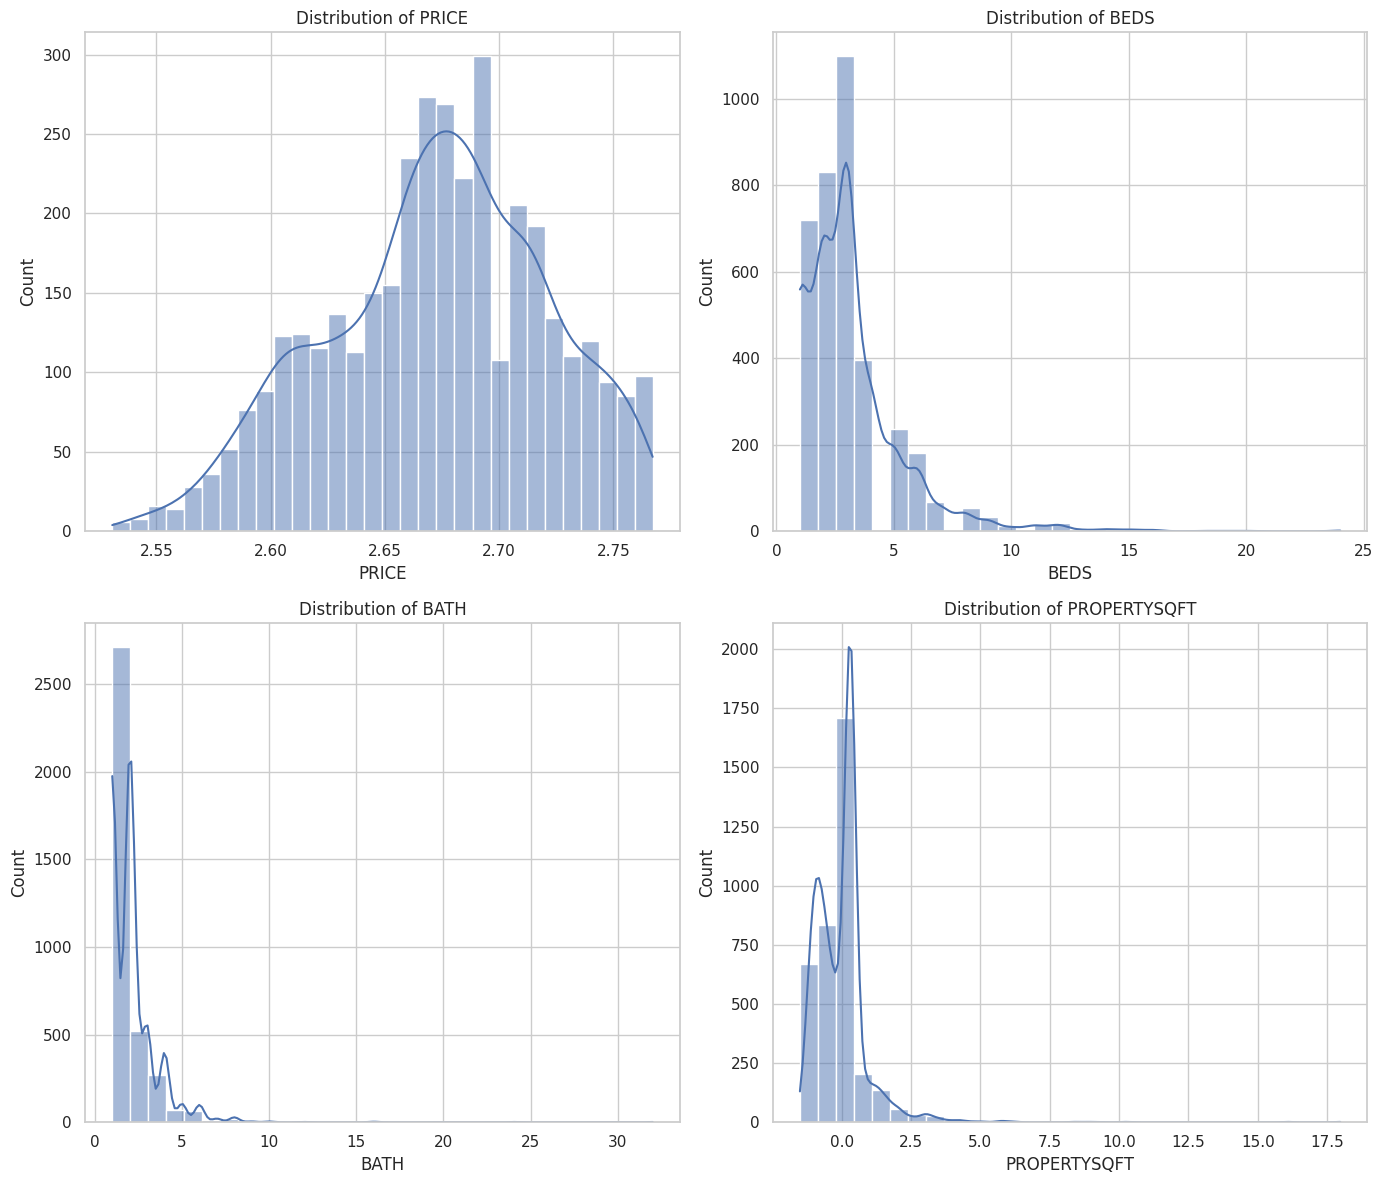

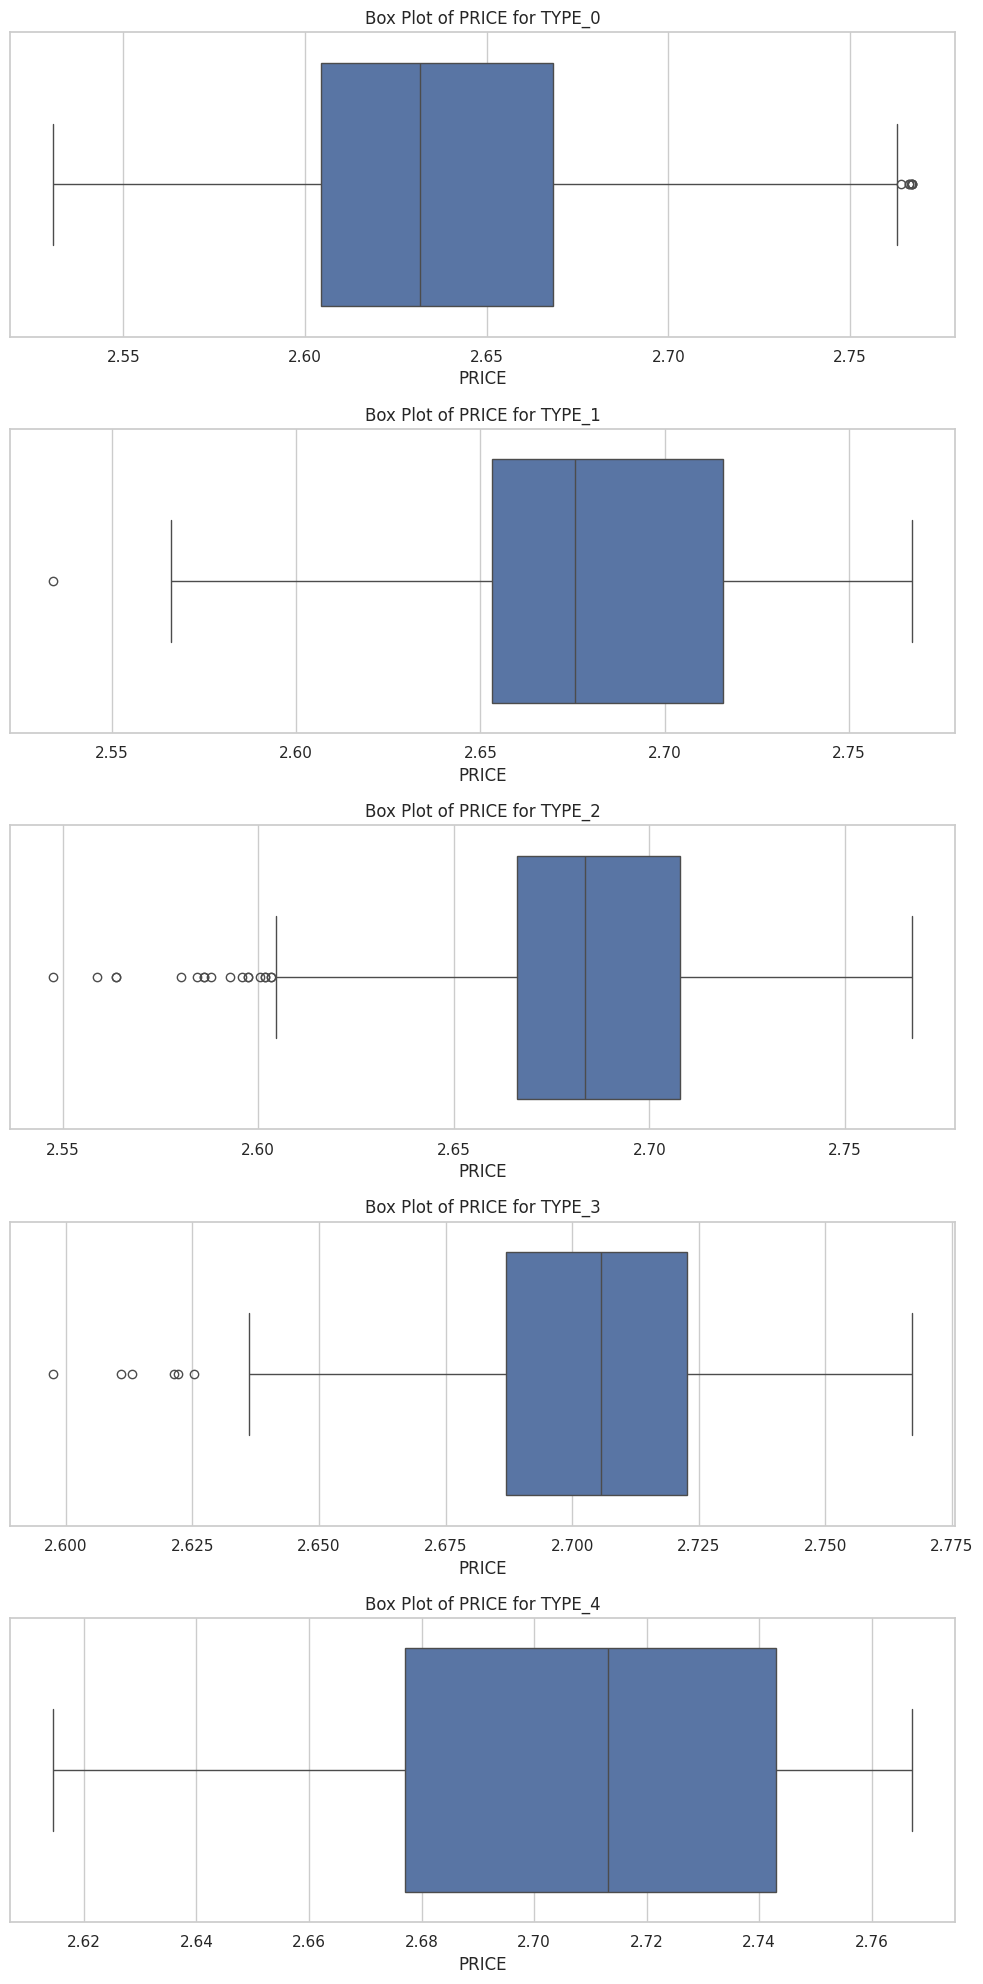

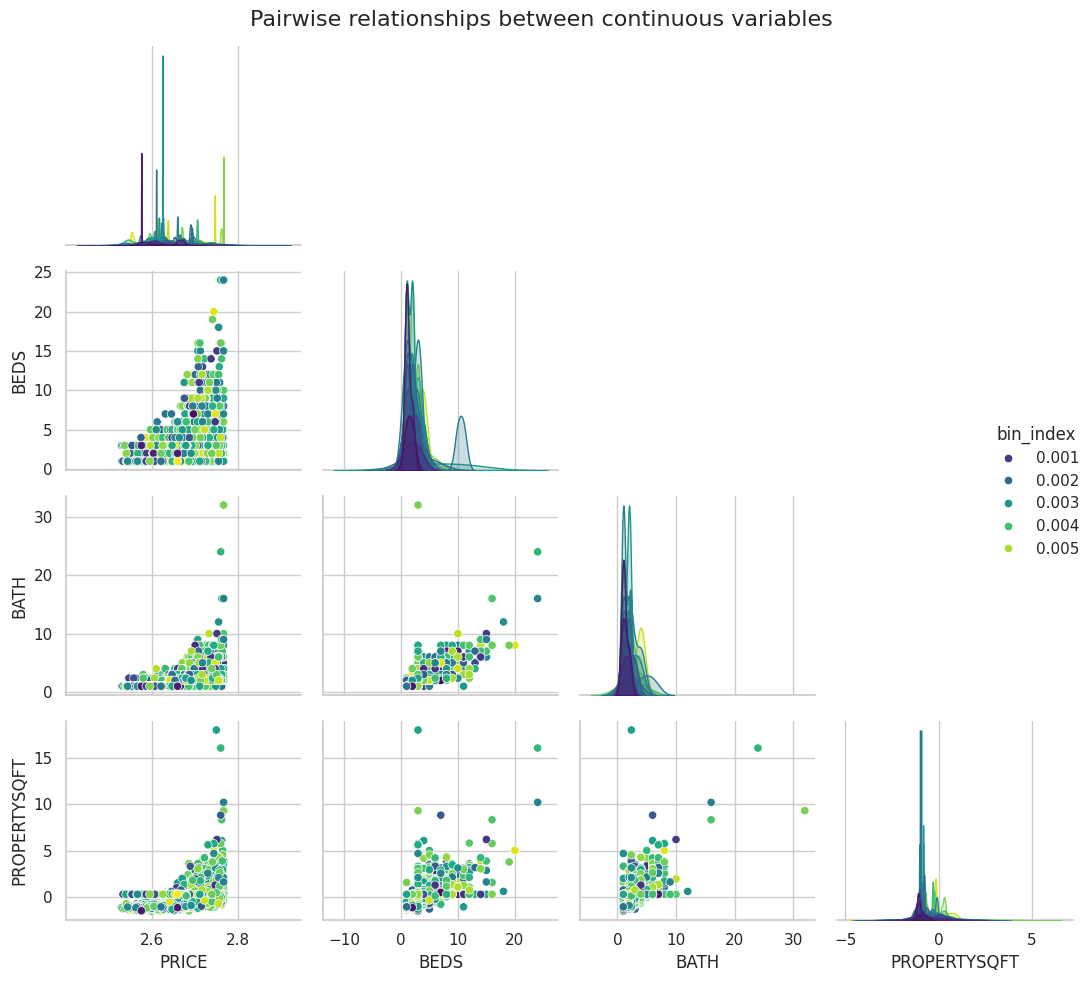

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.histplot(df['PRICE'], bins=30, kde=True, ax=axes[0, 0])
sns.histplot(df['BEDS'], bins=30, kde=True, ax=axes[0, 1])
sns.histplot(df['BATH'], bins=30, kde=True, ax=axes[1, 0])
sns.histplot(df['PROPERTYSQFT'], bins=30, kde=True, ax=axes[1, 1])
axes[0, 0].set_title('Distribution of PRICE')
axes[0, 1].set_title('Distribution of BEDS')
axes[1, 0].set_title('Distribution of BATH')
axes[1, 1].set_title('Distribution of PROPERTYSQFT')
plt.tight_layout()


type_columns = [col for col in df.columns if 'TYPE_' in col]
fig, axes = plt.subplots(len(type_columns), 1, figsize=(10, 20))
for i, type_col in enumerate(type_columns):

    df_temp = df[df[type_col] == 1]
    sns.boxplot(x='PRICE', data=df_temp, ax=axes[i])
    axes[i].set_title(f'Box Plot of PRICE for {type_col}')
plt.tight_layout()


sns.pairplot(df, vars=['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT'], hue='bin_index', palette='viridis', corner=True)
plt.suptitle('Pairwise relationships between continuous variables', verticalalignment='top', fontsize=16)
plt.tight_layout()


plt.show()

In [ ]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,bin_index,TYPE_0,TYPE_1,TYPE_2,TYPE_3,TYPE_4
count,3685.000000,3685.000000,3685.000000,3.685000e+03,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000
mean,2.672841,3.150611,2.114707,-1.156922e-17,0.003420,0.347626,0.188874,0.245590,0.177476,0.040434
std,0.048754,2.178728,1.447363,1.000136e+00,0.001249,0.476281,0.391461,0.430495,0.382123,0.197002
min,2.530655,1.000000,1.000000,-1.507180e+00,0.000089,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.640271,2.000000,1.000000,-7.092162e-01,0.002521,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.675974,3.000000,2.000000,2.408298e-01,0.003604,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.707906,4.000000,2.373861,3.086171e-01,0.004405,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.767207,24.000000,32.000000,1.797252e+01,0.005680,1.000000,1.000000,1.000000,1.000000,1.000000


##Calculating the skewness

In [ ]:
for column in df.select_dtypes(include=[np.number]).columns:
    skewness_per_column = df[column].skew()
    print(f"Skewness for {column}: {skewness_per_column}")

Skewness for PRICE: -0.2580362645813078
Skewness for BEDS: 2.550735086117635
Skewness for BATH: 5.131801014621555
Skewness for PROPERTYSQFT: 4.560137256545873
Skewness for bin_index: -0.41595241268222033
Skewness for TYPE_0: 0.6401987144561014
Skewness for TYPE_1: 1.5904254453038849
Skewness for TYPE_2: 1.1825824306702541
Skewness for TYPE_3: 1.688978718449111
Skewness for TYPE_4: 4.668128176152872


##Correlation Mapping

In [ ]:
correlationn=pd.DataFrame()
for column in df.select_dtypes(include=[np.number]).columns:
    correlationn[column] = df[column]
correlationn

,PRICE,BEDS,BATH,PROPERTYSQFT,bin_index,TYPE_0,TYPE_1,TYPE_2,TYPE_3,TYPE_4
0,2.614496,2,2.0,-0.427582,0.004055,0.0,1.0,0.0,0.0,0.0
1,2.600349,4,2.0,0.149768,0.002912,0.0,0.0,1.0,0.0,0.0
2,2.670310,5,2.0,2.017003,0.003850,0.0,0.0,1.0,0.0,0.0
3,2.688500,2,2.0,0.308617,0.002071,0.0,1.0,0.0,0.0,0.0
4,2.601763,1,1.0,-1.037789,0.004812,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3680,2.660471,1,1.0,0.308617,0.005616,1.0,0.0,0.0,0.0,0.0
3681,2.595927,1,1.0,0.308617,0.004595,1.0,0.0,0.0,0.0,0.0
3682,2.711940,1,1.0,0.308617,0.003326,1.0,0.0,0.0,0.0,0.0
3683,2.660368,2,1.0,-1.126974,0.000524,0.0,1.0,0.0,0.0,0.0


In [ ]:
relations=correlationn.corr()


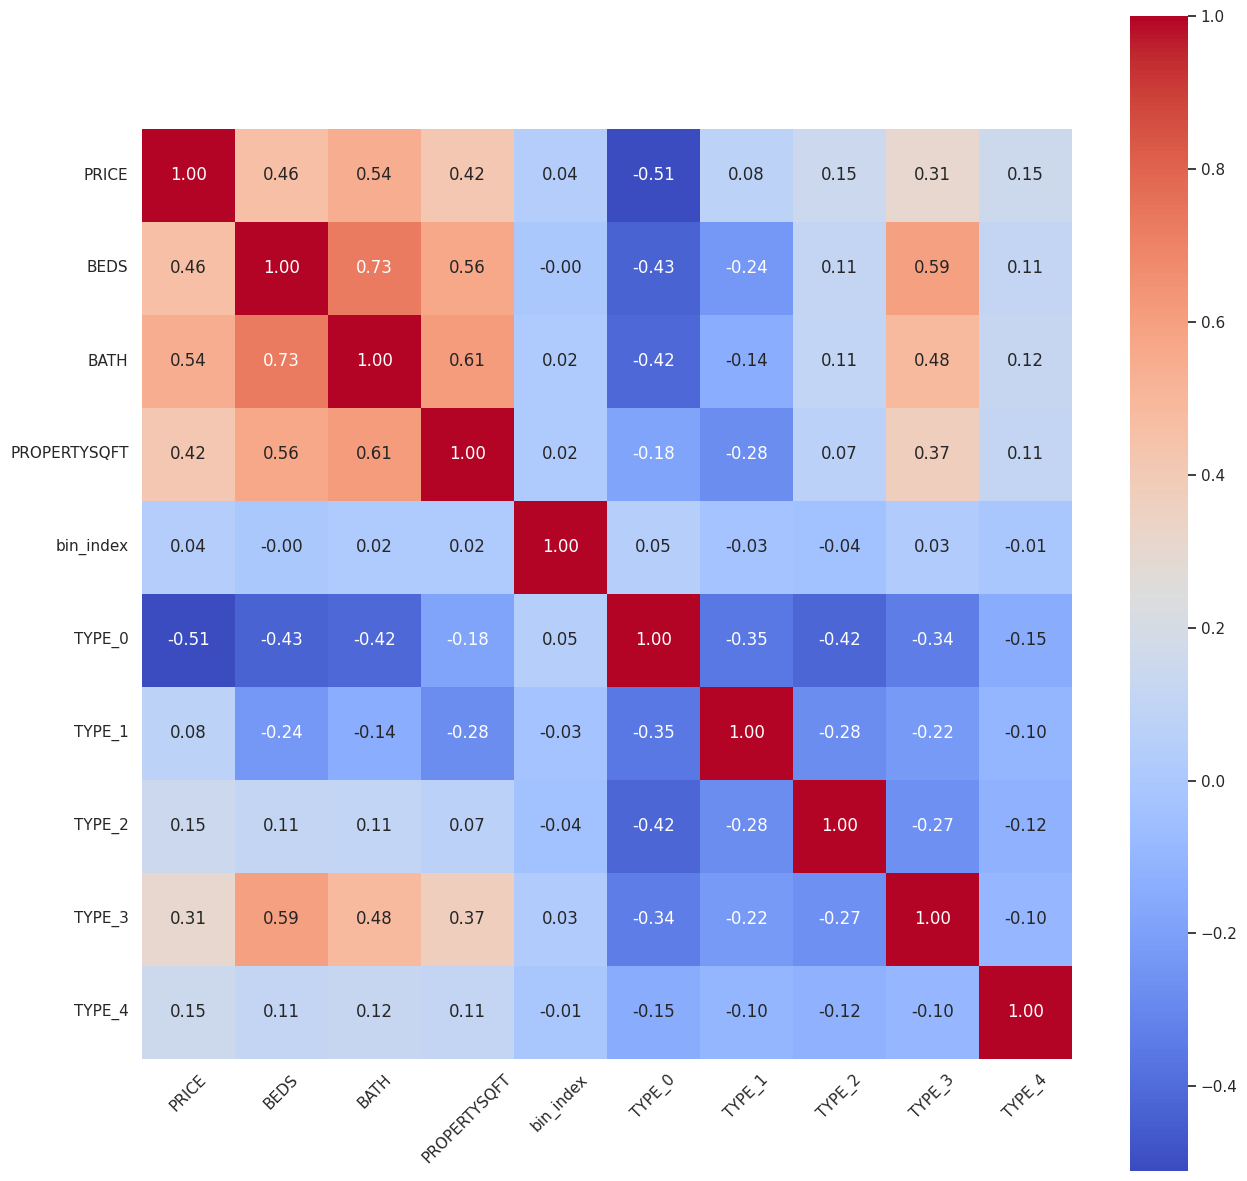

In [ ]:


plt.figure(figsize=(15, 15))
sns.heatmap(relations, annot=True, fmt=".2f", cmap="coolwarm", square=True)


plt.xticks(rotation=45)


plt.show()


In [ ]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,bin_index,TYPE_0,TYPE_1,TYPE_2,TYPE_3,TYPE_4
count,3685.000000,3685.000000,3685.000000,3.685000e+03,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000
mean,2.672841,3.150611,2.114707,-1.156922e-17,0.003420,0.347626,0.188874,0.245590,0.177476,0.040434
std,0.048754,2.178728,1.447363,1.000136e+00,0.001249,0.476281,0.391461,0.430495,0.382123,0.197002
min,2.530655,1.000000,1.000000,-1.507180e+00,0.000089,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.640271,2.000000,1.000000,-7.092162e-01,0.002521,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.675974,3.000000,2.000000,2.408298e-01,0.003604,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.707906,4.000000,2.373861,3.086171e-01,0.004405,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.767207,24.000000,32.000000,1.797252e+01,0.005680,1.000000,1.000000,1.000000,1.000000,1.000000


##LINEAR REGRESSION FOR REGRESSION TASK

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline


X = df.drop(['PRICE', 'TYPE_0', 'TYPE_1', 'TYPE_2', 'TYPE_3', 'TYPE_4'], axis=1)
y_price = df['PRICE']
y_type = df[['TYPE_0', 'TYPE_1', 'TYPE_2', 'TYPE_3', 'TYPE_4']]

X_train, X_test, y_train_price, y_test_price, y_train_type, y_test_type = train_test_split(
    X, y_price, y_type, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_price)


price_predictions = lin_reg.predict(X_test_scaled)


mse = mean_squared_error(y_test_price, price_predictions)
print(f'Mean Squared Error for Linear Regression: {mse}')


Mean Squared Error for Linear Regression: 0.0015867366197296895


##LOGISTIC REGRESSION FOR CLASSIFICATION

In [ ]:

logistic_models = {}
for column in y_train_type.columns:
    clf = LogisticRegression()
    clf.fit(X_train_scaled, y_train_type[column])
    logistic_models[column] = clf

# Predict on the test set and evaluate
for column, model in logistic_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_type[column], y_pred)
    print(f'Accuracy for {column}: {accuracy}')


Accuracy for TYPE_0: 0.8263229308005428
Accuracy for TYPE_1: 0.7978290366350068
Accuracy for TYPE_2: 0.7394843962008141
Accuracy for TYPE_3: 0.8765264586160109
Accuracy for TYPE_4: 0.9647218453188603


##USE OF RANDOM FOREST CLASSIFIER FOR CLASSIFICATION

In [ ]:

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train_type)


y_pred_rf = rf_clf.predict(X_test_scaled)
print(classification_report(y_test_type, y_pred_rf))


              precision    recall  f1-score   support

           0       0.71      0.74      0.73       253
           1       0.50      0.34      0.41       138
           2       0.53      0.42      0.47       186
           3       0.68      0.62      0.65       136
           4       0.00      0.00      0.00        24

   micro avg       0.63      0.54      0.58       737
   macro avg       0.48      0.43      0.45       737
weighted avg       0.60      0.54      0.56       737
 samples avg       0.54      0.54      0.54       737



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## HYPOTHESIS TESTING USING t-TEST

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

property_types = ['TYPE_0', 'TYPE_1', 'TYPE_2', 'TYPE_3', 'TYPE_4']
features = ['BEDS', 'BATH', 'PROPERTYSQFT']

def perform_t_test_within_type(df, property_type, feature):

    type_data = df[df[property_type] == 1]


    median_value = type_data[feature].median()


    low_group = type_data[type_data[feature] <= median_value]['PRICE']
    high_group = type_data[type_data[feature] > median_value]['PRICE']


    t_stat, p_val = ttest_ind(low_group, high_group, equal_var=False)

    return t_stat, p_val

results = []


for type in property_types:
    for feature in features:
        t_stat, p_val = perform_t_test_within_type(df, type, feature)
        results.append({
            'Property Type': type,
            'Feature': feature,
            'T-Statistic': t_stat,
            'P-Value': p_val
        })

results_df = pd.DataFrame(results)
print(results_df)


   Property Type       Feature  T-Statistic       P-Value
0         TYPE_0          BEDS    -3.421433  6.784721e-04
1         TYPE_0          BATH   -24.013013  6.151012e-84
2         TYPE_0  PROPERTYSQFT   -18.994668  8.081147e-12
3         TYPE_1          BEDS    -2.437124  1.525773e-02
4         TYPE_1          BATH    -5.456416  7.499830e-07
5         TYPE_1  PROPERTYSQFT   -12.709010  2.640346e-33
6         TYPE_2          BEDS   -11.040644  2.596472e-26
7         TYPE_2          BATH    -9.860692  4.435220e-21
8         TYPE_2  PROPERTYSQFT   -11.601241  4.444253e-29
9         TYPE_3          BEDS    -8.554967  8.443450e-17
10        TYPE_3          BATH   -11.674059  2.686976e-28
11        TYPE_3  PROPERTYSQFT    -8.169549  1.637532e-15
12        TYPE_4          BEDS    -8.945954  1.490146e-15
13        TYPE_4          BATH    -8.932016  1.617303e-15
14        TYPE_4  PROPERTYSQFT    -9.665527  2.258709e-17


In [ ]:
df.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,bin_index,TYPE_0,TYPE_1,TYPE_2,TYPE_3,TYPE_4
0,2.614496,2,2.0,-0.427582,0.004055,0.0,1.0,0.0,0.0,0.0
1,2.600349,4,2.0,0.149768,0.002912,0.0,0.0,1.0,0.0,0.0
2,2.670310,5,2.0,2.017003,0.003850,0.0,0.0,1.0,0.0,0.0
3,2.688500,2,2.0,0.308617,0.002071,0.0,1.0,0.0,0.0,0.0
4,2.601763,1,1.0,-1.037789,0.004812,1.0,0.0,0.0,0.0,0.0
